In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, normalisation, evaluation
import pylab as plt
from scipy import stats
import xlwings as xw

/Users/matthias/anaconda/lib/python2.7/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory
  stacklevel=stacklevel + 1):


In [5]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2016-06-24/"
#path = "/Users/matthias/Desktop/PhD Temp/2017-02-22/"
#path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 4191
files_end = 4300#4706

In [6]:
# cup configuration
#cup_config = cycle_Sb
Sn_isotopes = ["112", "114", "115", "116", "117", "118", "119", "120", "122", "124"]
cup_config = cycles2

# Mass Range of cup configuration
mass_range = cycles2_mass_range

# Isotopes used for Interference correction
#corr_isotopes_1 = {"Cd" : "111", "Te" : "125"}
corr_isotopes_2 = {"Cd" : "111", "Te" : "125", "Xe": "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "126", "Xe": "129"}

norm_ratio = ["122","118"]
denom_isotope = norm_ratio[1]
Sn_monitor = ["111", "113", "125"]


def eval_iso_list(isotopes_list,norm_ratio, monitor_iso):
    isotope_nom = norm_ratio[0]
    isotope_den = norm_ratio[1]
    isotopes_list.remove(norm_ratio[1])
    for i in range(len(monitor_iso)):
        isotopes_list.append(monitor_iso[i])
    isotopes_list.sort()
    return isotopes_list

isotope_ls = eval_iso_list(Sn_isotopes, norm_ratio, Sn_monitor)

data_sample_column = [(i + "/" + denom_isotope) for i in isotope_ls]    
isotopes = [isotope_ls]

law = "exp"
n_GPL = 0.2

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True

In [214]:
database["Sn"]["Ratios"].get_all_ratios("124")

{'112': 0.16787170304299842,
 '114': 0.11371826925242698,
 '115': 0.058371061107732505,
 '116': 2.5114309525418386,
 '117': 1.3250501159988288,
 '118': 4.183475234813163,
 '119': 1.4833772552199473,
 '120': 5.631011104353898,
 '122': 0.8000878437732278}

In [215]:

mass_range.get_mass_range()

{'110': ['Pd', 'Cd'],
 '111': ['Cd'],
 '112': ['Sn', 'Cd'],
 '113': ['Cd', 'In'],
 '114': ['Sn', 'Cd'],
 '115': ['Sn', 'In'],
 '116': ['Sn', 'Cd'],
 '117': ['Sn'],
 '118': ['Sn'],
 '119': ['Sn'],
 '120': ['Sn', 'Te'],
 '121': ['Sb'],
 '122': ['Sn', 'Te'],
 '123': ['Sb', 'Te'],
 '124': ['Sn', 'Te', 'Xe'],
 '125': ['Te'],
 '126': ['Te', 'Xe'],
 '127': ['I'],
 '129': ['Xe'],
 '131': ['Xe']}

In [9]:
mass_range.get_mass_range()

{'110': ['Pd', 'Cd'],
 '111': ['Cd'],
 '112': ['Sn', 'Cd'],
 '113': ['Cd', 'In'],
 '114': ['Sn', 'Cd'],
 '115': ['Sn', 'In'],
 '116': ['Sn', 'Cd'],
 '117': ['Sn'],
 '118': ['Sn'],
 '119': ['Sn'],
 '120': ['Sn', 'Te'],
 '121': ['Sb'],
 '122': ['Sn', 'Te'],
 '123': ['Sb', 'Te'],
 '124': ['Sn', 'Te', 'Xe'],
 '125': ['Te'],
 '126': ['Te', 'Xe'],
 '127': ['I'],
 '129': ['Xe'],
 '131': ['Xe']}

In [10]:
mass_range.get_order_of_corr(corr_isotopes_2)

[{'111', '113', '115', '117', '118', '119', '121', '125', '127', '129', '131'},
 {'110', '112', '114', '116', '120', '122', '123', '124', '126'}]

In [263]:
# Create definitions for e

def df_signal_raw(sample_files, )
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
#files_1 = range(4094,4098,1) + range(4099, 4172, 1)

for sample in files_1:
    
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)

#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(5234)
df_all

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:02:00,1,blank sol,0.001041,0.000785,0.006104,0.001405,0.003873,0.001203,0.002560,0.000055,...,5.653050e-05,1.746100e-06,0.001082,0.000010,0.000777,4.377730e-05,0.006298,0.001435,0.004016,0.001243
2016-06-24 11:02:00,2,blank sol,0.001135,0.000877,0.006759,0.001550,0.004355,0.001368,0.002832,0.000076,...,5.222410e-05,-5.402500e-06,0.001116,0.000026,0.000798,3.383400e-05,0.006446,0.001464,0.004112,0.001303
2016-06-24 11:02:00,3,blank sol,0.001011,0.000791,0.006007,0.001367,0.003795,0.001189,0.002498,0.000051,...,7.589920e-05,1.531790e-05,0.000989,0.000028,0.000765,-2.570000e-07,0.005861,0.001343,0.003672,0.001187
2016-06-24 11:02:00,4,blank sol,0.000882,0.000650,0.005323,0.001171,0.003315,0.001041,0.002218,0.000039,...,4.075270e-05,-6.104000e-06,0.000873,0.000008,0.000647,2.602160e-05,0.005196,0.001162,0.003215,0.001019
2016-06-24 11:02:00,5,blank sol,0.000916,0.000685,0.005503,0.001229,0.003437,0.001083,0.002293,0.000055,...,4.218660e-05,-9.676800e-06,0.000764,0.000021,0.000594,2.389170e-05,0.004750,0.001034,0.002869,0.000889
2016-06-24 11:02:00,6,blank sol,0.000725,0.000537,0.004551,0.000970,0.002745,0.000888,0.001888,0.000042,...,4.577770e-05,9.616800e-06,0.000699,0.000005,0.000518,1.039700e-05,0.004323,0.000915,0.002581,0.000812
2016-06-24 11:02:00,7,blank sol,0.001003,0.000742,0.006009,0.001405,0.003816,0.001183,0.002536,0.000061,...,7.302920e-05,2.461100e-06,0.000932,0.000054,0.000674,3.951580e-05,0.005533,0.001222,0.003433,0.001109
2016-06-24 11:02:00,8,blank sol,0.000722,0.000537,0.004475,0.000980,0.002708,0.000860,0.001861,0.000068,...,6.155920e-05,1.390250e-05,0.000672,0.000003,0.000528,3.454500e-05,0.004244,0.000905,0.002552,0.000817
2016-06-24 11:02:00,9,blank sol,0.000681,0.000491,0.004226,0.000904,0.002514,0.000799,0.001770,0.000023,...,4.075740e-05,1.676200e-05,0.000714,0.000020,0.000543,3.099440e-05,0.004519,0.001001,0.002736,0.000871


In [271]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio, law, n_GPL)
        df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        df_bgd_corr = new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
        new_corr.line2_corr(df_bgd_corr, "119")
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio, law, n_GPL)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [272]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)

#df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.8066)/(df_internal_norm["118"]/24.223)
#df_internal_sub = df_internal_sub[df_internal_sub["118"] >= 7]
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")
df_internal_sub

,cycle,sample,111/118,112/118,113/118,114/118,115/118,116/118,117/118,119/118,...,116,117,118,119,120,122,124,125,Cd/Sn,Te/Sn
date,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:14:00,1,NIST 200ppb,NaN,0.040132,-0.000004,0.027180,0.013940,0.600215,0.316675,0.354609,...,6.686682,3.576933,11.450484,4.115929,15.832891,2.310361,2.964026,0.000019,NaN,0.000006
2016-06-24 11:14:00,2,NIST 200ppb,1.758768e-06,0.040130,0.000002,0.027173,0.013938,0.600203,0.316685,0.354591,...,6.579281,3.519670,11.266891,4.049755,15.579572,2.273386,2.916693,0.000050,3.035537e-06,0.000015
2016-06-24 11:14:00,3,NIST 200ppb,2.440456e-06,0.040126,0.000002,0.027168,0.013943,0.600244,0.316686,0.354594,...,6.786788,3.630467,11.621604,4.177319,16.069486,2.345021,3.008485,0.000038,4.211870e-06,0.000011
2016-06-24 11:14:00,4,NIST 200ppb,1.039239e-06,0.040128,0.000002,0.027172,0.013942,0.600231,0.316692,0.354597,...,6.687058,3.577247,11.450924,4.115973,15.833772,2.310528,2.964456,0.000067,1.793665e-06,0.000020
2016-06-24 11:14:00,5,NIST 200ppb,9.018874e-06,0.040127,0.000010,0.027171,0.013941,0.600208,0.316676,0.354597,...,6.580171,3.519944,11.267894,4.050120,15.580279,2.273455,2.916499,0.000044,1.556773e-05,0.000014
2016-06-24 11:14:00,6,NIST 200ppb,NaN,0.040133,NaN,0.027174,NaN,0.600275,0.316700,0.354597,...,6.671347,3.568475,11.422558,4.105769,15.793587,2.304781,2.956630,0.000046,NaN,0.000014
2016-06-24 11:14:00,7,NIST 200ppb,1.098898e-06,0.040135,0.000002,0.027170,0.013941,0.600251,0.316700,0.354609,...,6.679470,3.573081,11.437104,4.111067,15.813677,2.307550,2.960338,0.000032,1.896901e-06,0.000010
2016-06-24 11:14:00,8,NIST 200ppb,2.723902e-06,0.040125,0.000004,0.027167,0.013942,0.600220,0.316680,0.354603,...,6.711956,3.590316,11.492700,4.130874,15.889830,2.318545,2.974307,0.000072,4.702832e-06,0.000022
2016-06-24 11:14:00,9,NIST 200ppb,1.760549e-06,0.040126,0.000005,0.027172,0.013945,0.600239,0.316691,0.354611,...,6.641193,3.552483,11.371177,4.087280,15.721878,2.294023,2.942954,0.000073,3.039612e-06,0.000022


In [273]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
#df_internal_norm_mean = df_internal_norm_mean[df_internal_norm_mean["118"] >= 7]
df_internal_norm_mean
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,111/118,112/118,113/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:14:00,3.040550e-06,0.040129,4.011255e-06,0.027170,0.013942,0.600243,0.316693,0.354604,1.345896,0.19125,...,3.581942,11.465531,4.121166,15.852725,2.313155,2.967393,0.000051,5.249285e-06,0.000015,NIST 200ppb
2016-06-24 11:38:00,3.135039e-06,0.040130,4.459994e-06,0.027169,0.013941,0.600263,0.316698,0.354610,1.345877,0.19125,...,6.415677,20.536051,7.381680,28.394382,4.143353,5.315337,0.000124,5.411882e-06,0.000021,NIST 350ppb
2016-06-24 12:02:00,2.520805e-06,0.040136,2.924980e-06,0.027174,0.013942,0.600273,0.316700,0.354606,1.345897,0.19125,...,3.586404,11.480036,4.126578,15.874114,2.316478,2.971825,0.000097,4.350446e-06,0.000029,NIST 200ppb
2016-06-24 12:26:00,2.944085e-06,0.040131,4.419859e-06,0.027174,0.013942,0.600270,0.316700,0.354609,1.345901,0.19125,...,3.605932,11.542857,4.149301,15.961890,2.329399,2.988590,0.000086,5.079875e-06,0.000026,NIST 200ppb
2016-06-24 12:40:00,1.873563e-06,0.040134,3.967576e-06,0.027174,0.013942,0.600273,0.316700,0.354609,1.345907,0.19125,...,3.613408,11.566658,4.157810,15.994498,2.334102,2.994538,0.000102,3.232984e-06,0.000030,NIST 200ppb
2016-06-24 12:53:00,2.498089e-06,0.040138,4.849999e-06,0.027177,0.013942,0.600280,0.316704,0.354608,1.345920,0.19125,...,3.573453,11.438695,4.111842,15.817785,2.308317,2.961492,0.000095,4.477389e-06,0.000029,NIST 200ppb
2016-06-24 13:07:00,1.598176e-06,0.040137,3.685595e-06,0.027175,0.013943,0.600283,0.316708,0.354610,1.345904,0.19125,...,6.517535,20.862957,7.499693,28.850754,4.210428,5.401878,0.000178,2.757439e-06,0.000029,NIST 350ppb
2016-06-24 13:20:00,2.195275e-06,0.040137,4.310392e-06,0.027174,0.013943,0.600287,0.316707,0.354610,1.345925,0.19125,...,3.563090,11.405968,4.100282,15.774201,2.302165,2.953863,0.000105,3.786555e-06,0.000031,NIST 200ppb
2016-06-24 13:44:00,4.448777e-06,0.040138,5.851958e-06,0.027174,0.013944,0.600290,0.316709,0.354608,1.345924,0.19125,...,3.515846,11.255626,4.046571,15.568887,2.272576,2.916434,0.000099,7.669436e-06,0.000030,NIST 200ppb


In [274]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

111/118                 112/118            \
                                   mean           SD2      mean       SD2   
sample                                                                      
Allende HP 1_1             9.801392e-06  0.000000e+00  0.040145  0.000000   
Allende HP 1_2             6.325144e-05  0.000000e+00  0.040143  0.000000   
Allende bomb 1_2           7.259232e-05  0.000000e+00  0.040145  0.000000   
NIST 200ppb                2.134263e-06  2.399075e-06  0.040144  0.000010   
NIST 200ppb + 0.001ppb In  1.882288e-06  7.681591e-07  0.040144  0.000003   
NIST 200ppb + 0.005ppb U   1.602009e-06  1.822154e-06  0.040145  0.000004   
NIST 200ppb + 0.010ppb Cd  2.239243e-05  0.000000e+00  0.040150  0.000000   
NIST 200ppb + 0.015ppb U  -5.068546e-07  0.000000e+00  0.040156  0.000000   
NIST 200ppb + 0.03ppb Cd   6.627654e-05  6.860328e-07  0.040144  0.000002   
NIST 200ppb + 0.056ppb Zr  1.596995e-07  1.112690e-06  0.040149  0.000007   
NIST 200ppb + 0.082ppb Rh  9.524310e-07  3.127240e-06  0.040147  0.000009   
NIST 200ppb + 0.109ppb Ru  3.311198e-06  2.474027e-06  0.040141  0.000002   
NIST 200ppb + 0.250ppb Pd  1.274970e-06  6.574236e-07  0.040144  0.000008   
NIST 200ppb + 0.440ppb Mo  2.182063e-06  7.308733e-07  0.040142  0.000006   
NIST 200ppb + ME           2.467869e-05  1.185626e-06  0.040145  0.000007   
NIST 350ppb                2.308170e-06  1.265682e-06  0.040139  0.000017   
ZH09-05 23.3_1_3           1.822762e-05  0.000000e+00  0.040145  0.000000   
ZH09-05 23.3_1_5           1.051041e-05  0.000000e+00  0.040145  0.000000   
ZH09-05 23.3_1_5 new       1.255763e-05  0.000000e+00  0.040143  0.000000   
ZH09-05_23.3_1_4           7.326880e-06  0.000000e+00  0.040143  0.000000   

                            113/118                 114/118                \
                               mean           SD2      mean           SD2   
sample                                                                      
Allende HP 1_1             0.000012  0.000000e+00  0.027184  0.000000e+00   
Allende HP 1_2             0.000061  0.000000e+00  0.027184  0.000000e+00   
Allende bomb 1_2           0.000073  0.000000e+00  0.027189  0.000000e+00   
NIST 200ppb                0.000004  2.443251e-06  0.027179  6.605967e-06   
NIST 200ppb + 0.001ppb In  0.000005  2.426694e-06  0.027179  1.202578e-06   
NIST 200ppb + 0.005ppb U   0.000003  1.915757e-06  0.027180  9.803748e-07   
NIST 200ppb + 0.010ppb Cd  0.000024  0.000000e+00  0.027186  0.000000e+00   
NIST 200ppb + 0.015ppb U   0.000003  0.000000e+00  0.027188  0.000000e+00   
NIST 200ppb + 0.03ppb Cd   0.000065  7.870772e-07  0.027181  1.572724e-06   
NIST 200ppb + 0.056ppb Zr  0.000002  4.880277e-06  0.027182  8.666748e-07   
NIST 200ppb + 0.082ppb Rh  0.000004  2.071625e-06  0.027182  6.643904e-06   
NIST 200ppb + 0.109ppb Ru  0.000003  2.361424e-06  0.027177  6.910268e-06   
NIST 200ppb + 0.250ppb Pd  0.000003  2.662695e-06  0.027180  3.599806e-06   
NIST 200ppb + 0.440ppb Mo  0.000003  5.712595e-07  0.027179  3.369706e-06   
NIST 200ppb + ME           0.000024  8.049739e-07  0.027181  3.407545e-06   
NIST 350ppb                0.000004  7.786456e-07  0.027175  9.579184e-06   
ZH09-05 23.3_1_3           0.000020  0.000000e+00  0.027183  0.000000e+00   
ZH09-05 23.3_1_5           0.000013  0.000000e+00  0.027183  0.000000e+00   
ZH09-05 23.3_1_5 new       0.000014  0.000000e+00  0.027180  0.000000e+00   
ZH09-05_23.3_1_4           0.000009  0.000000e+00  0.027178  0.000000e+00   

                            115/118                    ...            122  \
                               mean           SD2      ...           mean   
sample                                                 ...                  
Allende HP 1_1             0.013942  0.000000e+00      ...       2.487677   
Allende HP 1_2             0.013943  0.000000e+00      ...       2.391030   
Allende bomb 1_2           0.013945  0.000000e+00      ...       2.614387   
NIST 200ppb               

In [196]:
#df_internal_norm_mean.describe()

In [ ]:
# variation of standard data + mean + 2SD
sel_ratio = "124/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [ ]:
# variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].median(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].quantile(0.25), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].quantile(0.75), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [ ]:
# outlier corr variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = new_corr.mad_outlier_rejection(plot_Nist.drop("sample", axis=1))
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [243]:
std_used = "NIST 200ppb"
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == std_used)].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 0.1]
corr_values_2 = corr_values[corr_values["sample"] == std_used]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
sample_2 = corr_values_2["sample"]
std_mean = corr_values[(corr_values["sample"] == std_used)].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]
new_2 = corr_values_2[corr_values_2.columns[corr_values_2.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new_2 / ((new_2.shift(1) + new_2.shift(-1))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
epsilon_NIST= epsilon_NIST[epsilon_NIST["sample"] != std_used]
epsilon_2 = epsilon_2[epsilon_2["sample"] == std_used]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=False)
#epsilon_comp.index = epsilon_comp["Date"]
#epsilon_comp.columns
epsilon_comp = epsilon_comp.sort_index(axis=0)

In [244]:
#epsilon_comp = epsilon_comp.drop([datetime.strptime("2017-02-24 15:18", "%Y-%m-%d %H:%M")])
epsilon_comp

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 200ppb
2016-06-24 11:38:00,1.273892e+03,-1.009165,2859.504578,-1.275102,-0.535624,-0.107882,-0.017805,-1.110223e-12,0.188252,0.280614,...,7900.018341,7899.798830,7899.878113,7899.281737,7899.273399,7899.112532,6798.391507,1.275070e+03,-618.469197,NIST 350ppb
2016-06-24 12:02:00,-1.575887e+03,1.314311,-3061.512106,0.481243,-0.178919,0.333925,0.107943,2.220446e-12,0.003119,0.026334,...,-20.959339,-20.999444,-20.931861,-20.866610,-20.672167,-20.706705,4113.120157,-1.576379e+03,4191.725867,NIST 200ppb
2016-06-24 12:26:00,3.399418e+03,-0.814488,2824.992040,0.031739,0.120099,-0.089028,0.000794,-1.110223e-12,0.033932,0.004938,...,16.739852,16.930930,17.156834,17.311012,17.671284,18.130945,-1369.799632,3.397300e+03,-1399.560461,NIST 200ppb
2016-06-24 12:40:00,-3.114750e+03,-0.298885,-1439.900703,-0.412992,-0.070278,-0.022365,-0.077678,0.000000e+00,-0.009132,0.057762,...,66.064251,66.037389,65.944231,65.866362,65.738757,65.534242,1308.195364,-3.234498e+03,1198.986459,NIST 200ppb
2016-06-24 12:53:00,2.279301e+03,0.663961,1717.893469,0.839971,-0.203495,-0.052597,0.033535,0.000000e+00,0.021227,-0.057560,...,-41.233866,-41.456648,-41.664647,-41.905715,-42.348068,-42.728902,-805.909338,2.756932e+03,-707.611244,NIST 200ppb
2016-06-24 13:07:00,-3.190016e+03,-0.471224,-1953.476887,-0.350750,0.002242,-0.098792,0.011976,0.000000e+00,0.053153,0.274870,...,8265.244320,8265.059845,8264.928105,8264.603545,8264.590114,8263.922469,7816.364849,-3.326578e+03,-269.342591,NIST 350ppb
2016-06-24 13:20:00,-3.679777e+03,-0.152189,-1944.583864,-0.297606,-0.185215,0.091702,0.023821,-1.110223e-12,0.008227,-0.042944,...,52.023340,51.826180,51.664582,51.528032,51.164369,50.697969,754.925197,-3.765358e+03,660.410916,NIST 200ppb
2016-06-24 13:44:00,1.206773e+04,-0.424327,4488.399543,-0.853729,0.562184,-0.041391,-0.051677,2.220446e-12,-0.066299,-0.038019,...,-7.752315,-7.340064,-6.980053,-6.576930,-5.864278,-4.858941,-95.255895,1.206211e+04,-86.908464,NIST 200ppb


In [245]:
def SD2(x):
    SD2 = np.nanstd(x, ddof=1) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum.ix[:,"112/120":"124/120"]

112/120          113/120           114/120        \
                             mean   SD2       mean       SD2    mean   SD2   
sample                                                                       
Allende HP 1_1              -0.28   NaN   27210.67       NaN    0.35   NaN   
Allende HP 1_2              -0.58   NaN  166459.04       NaN    0.84   NaN   
Allende bomb 1_2            -0.09   NaN  143466.99       NaN    1.95   NaN   
NIST 200ppb                  0.02  1.18     289.76   7389.05    0.02  1.63   
NIST 200ppb + 0.001ppb In    0.60  1.22     269.99    528.16    0.48  1.40   
NIST 200ppb + 0.005ppb U     0.81  1.57   -1350.38   4505.98    1.07  2.35   
NIST 200ppb + 0.010ppb Cd   -0.16   NaN   89366.51       NaN   -0.09   NaN   
NIST 200ppb + 0.015ppb U     0.77   NaN   -1930.37       NaN    0.73   NaN   
NIST 200ppb + 0.03ppb Cd     0.63  0.24  197304.16  37169.76    1.26  1.00   
NIST 200ppb + 0.056ppb Zr    0.84  0.13   -5979.86  22682.61    0.73  0.76   
NIST 200ppb + 0.082ppb Rh    0.31  2.01    2990.34   2409.55    0.85  2.45   
NIST 200ppb + 0.109ppb Ru   -0.18  0.73   -3090.95   4395.79   -0.63  3.03   
NIST 200ppb + 0.250ppb Pd    0.02  2.44   -2141.34   7498.31    0.54  1.94   
NIST 200ppb + 0.440ppb Mo   -0.23  1.74   -2429.07   4772.84    0.27  1.07   
NIST 200ppb + ME            -1.05  1.21   74479.75  15825.85   -0.48  0.44   
NIST 350ppb                 -0.58  0.76     -59.52   5130.02   -0.80  0.93   
ZH09-05 23.3_1_3            -0.07   NaN   39986.58       NaN    0.89   NaN   
ZH09-05 23.3_1_5            -0.51   NaN   32146.25       NaN    0.28   NaN   
ZH09-05 23.3_1_5 new        -0.59   NaN   24937.53       NaN   -0.43   NaN   
ZH09-05_23.3_1_4             0.01   NaN   15405.03       NaN   -0.88   NaN   

                          115/120       116/120       117/120       118/120  \
                             mean   SD2    mean   SD2    mean   SD2    mean   
sample                                                                        
Allende HP 1_1              -2.85   NaN   -0.29   NaN    0.01   NaN     0.0   
Allende HP 1_2              -0.80   NaN   -0.01   NaN    0.11   NaN     0.0   
Allende bomb 1_2            -0.09   NaN   -0.04   NaN    0.08   NaN     0.0   
NIST 200ppb                  0.00  1.16    0.00  0.26    0.00  0.28     0.0   
NIST 200ppb + 0.001ppb In   17.99  0.20    0.06  0.13    0.11  0.04    -0.0   
NIST 200ppb + 0.005ppb U    -0.65  0.43   -0.01  0.21    0.02  0.28     0.0   
NIST 200ppb + 0.010ppb Cd    0.00   NaN    0.03   NaN    0.09   NaN     0.0   
NIST 200ppb + 0.015ppb U    -0.27   NaN    0.05   NaN   -0.00   NaN    -0.0   
NIST 200ppb + 0.03ppb Cd    -0.22  0.84    0.03  0.16    0.05  0.23    -0.0   
NIST 200ppb + 0.056ppb Zr    0.60  1.83    0.07  0.13    0.11  0.09     0.0   
NIST 200ppb + 0.082ppb Rh    0.74  1.05    0.08  0.58    0.10  0.42    -0.0   
NIST 200ppb + 0.109ppb Ru   -0.65  1.33    0.00  0.25   -0.03  0.36     0.0   
NIST 200ppb + 0.250ppb Pd    0.55  1.20    0.02  0.21    0.04  0.24     0.0   
NIST 200ppb + 0.440ppb Mo    0.42  2.63   -0.17  0.00    0.06  0.58    -0.0   
NIST 200ppb + ME             0.51  1.42   -0.09  0.15   -0.12  0.06     0.0   
NIST 350ppb                 -0.03  0.97   -0.06  0.16    0.03  0.11    -0.0   
ZH09-05 23.3_1_3            -1.72   NaN    0.18   NaN   -0.07   NaN    -0.0   
ZH09-05 23.3_1_5            -1.92   NaN   -0.30   NaN   -0.17   NaN    -0.0   
ZH09-05 23.3_1_5 new        -1.81   NaN    0.04   NaN   -0.15   NaN     0.0   
ZH09-05_23.3_1_4            -1.85   NaN    0.15   NaN    0.01   NaN     0.0   

                               119/120       122/120       124/120        
                           SD2    mean   SD2    mean   SD2    mean   SD2  
sample                                                                    
Allende HP 1_1             NaN    0.26   NaN    0.36   NaN    0.44   NaN  
Allende HP 1_2             NaN    0.10   NaN    0.10   NaN   -0.03   NaN  
Allende bomb 1_2           NaN    0.09

In [101]:
### sel_ratio = "112/118"
std = "NIST 200ppb"

def plot_epsilon(sel_ratio, std, xlim):
    x = range(1, len(epsilon_sum.index)+1)
    plt.errorbar(epsilon_sum[sel_ratio]["mean"], x, xerr = epsilon_sum[sel_ratio]["SD2"], ls='none', marker="o")
    plt.title("samples" + ", 2SD = " + str(np.round((2*epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].std()),2)) + ", n= " +  str((epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].count())))
    plt.xlim(xlim)
    plt.ylim([0.5, len(epsilon_sum.index)+1])
    plt.yticks(x, epsilon_sum.index, size='small', rotation=0)
    plt.axvline(epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].mean(), color='k', linestyle='-')
    plt.axvline(epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].mean()+ 2*epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].std(), color='r', linestyle='--')
    plt.axvline(epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].mean()- 2*epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].std(), color='r', linestyle='--')
    #plt.axvline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
    plt.ylabel(r'$\mathregular{\epsilon^{'+sel_ratio+'}}$Sn$_{NIST}$')
    #savefig(path+"epsilon_118.pdf", bbox_inches='tight')

In [ ]:
wb = xw.books.add()
#wb.sheets.add()
wb.sheets["Sheet1"].range('A1').value = df_all
df_all_mean = df_all.drop("cycle", axis=1).groupby(df_all.index).mean()
df_all_mean["sample"] = df_all[~df_all.index.duplicated(keep='first')]["sample"]
wb.sheets["Sheet1"].range('A344').value = df_all_mean

In [ ]:
#wb.sheets.add()
wb.sheets[3].range('AF1').value = df_internal_sub
#df_all_mean = df_all.drop("cycle", axis=1).groupby(df_all.index).mean()
#df_all_mean["sample"] = df_all[~df_all.index.duplicated(keep='first')]["sample"]
#xw.Range('A344').value = df_all_mean

In [ ]:
#wb.sheets.add()
wb.sheets[4].range('A21').value = df_internal_norm_mean_sd

In [ ]:
wb.sheets[4].range('BF21').value = epsilon_comp

In [ ]:
#epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"]["117/118"].std()
wb.sheets[4].range('BF36').value = epsilon_sum

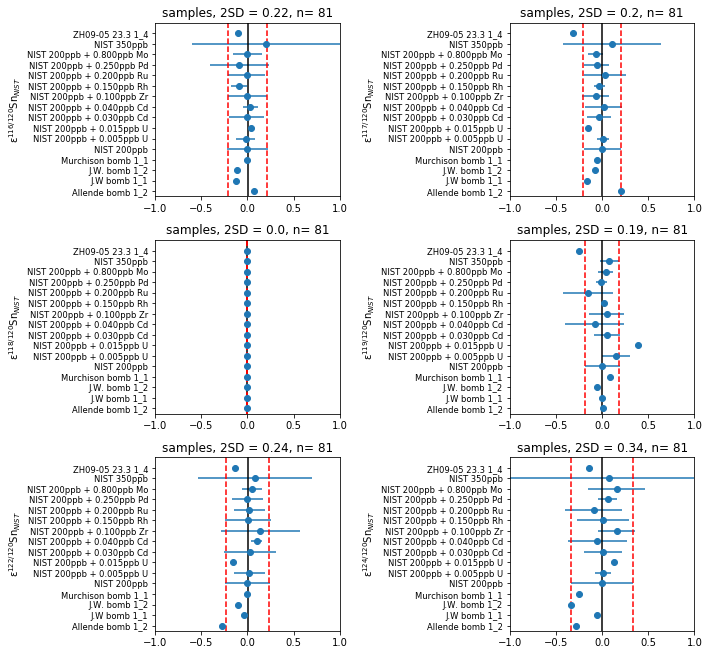

In [19]:
#sel_ratio = ["116/118", "117/118", "119/118", "120/118", "122/118", "124/118"]
#sel_ratio = ["116/119", "117/119", "118/119", "120/119", "122/119", "124/119"]
sel_ratio = ["116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]
#sel_ratio = ["112/120", "114/120", "115/120"]
#sel_ratio = ["112/118", "114/118", "115/118"]
xlim = [-1, 1]

fig = plt.figure(figsize=(10,15))

for i in range(len(sel_ratio)):
    ax = plt.subplot(5,2,i+1)
    plot_epsilon(sel_ratio[i], "NIST 200ppb", xlim)
fig.tight_layout()
#wb.sheets[4].pictures.add(fig, name= '116/120 norm - bgd_corr 1', update = True)
#savefig(path+"epsilon_x_bgd_118_2_100ppb.pdf", bbox_inches='tight')

In [ ]:
sel_ratio = "116/118"
epsilon_comp = epsilon_comp[epsilon_comp["sample"] == "NIST 200ppb"]
x = epsilon_comp.index
plt.plot(x, epsilon_comp[sel_ratio], marker="o")
plt.ylim([-0.5, 0.5])
#plt.xticks(x, epsilon_comp["sample"], size='small', rotation=90)
plt.axhline(epsilon_comp[sel_ratio].mean(), color='k', linestyle='-')
plt.axhline(epsilon_comp[sel_ratio].mean()+ 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(epsilon_comp[sel_ratio].mean()- 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [ ]:
df_all.to_csv(path + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='w', header=True)

In [275]:
df_internal_norm.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_122_118_bgd_corr_outlier_corr_all_new_bgd_corr.csv", mode='w', header=True)

In [276]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_122_118_bgd_corr_outlier_corr_new_bgd_corr.csv", mode='w', header=True)

In [ ]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [ ]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [ ]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [ ]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [ ]:
#old Cd/Sn & Te/Sn extraction - doesn't include bgd corr
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [ ]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date")

In [ ]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

In [ ]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

In [ ]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [ ]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

In [ ]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee